### 1. 출퇴근 시간에 따릉이가 가장 많이 사용된 지역 (2019년 11월 기준). 
### 2. 전체적으로 따릉이가 가장 많이 사용된 지역 (2019년 11월 기준).

In [2]:
df = pd.read_csv('자전거대여정보.csv', encoding='cp949')
df

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-04392,2019-11-28 23:07:06,2377,수서역 5번출구 뒤,9,2019-11-28 23:18:44,1203,밀리아나2빌딩 앞,5,11,1980.0
1,SPB-23502,2019-11-28 22:43:23,2613,잠실나들목,3,2019-11-29 00:07:07,1203,밀리아나2빌딩 앞,1,82,11130.0
2,SPB-11498,2019-11-29 00:04:35,1256,문정현대아파트 교차로,6,2019-11-29 00:11:24,1203,밀리아나2빌딩 앞,14,6,800.0
3,SPB-16665,2019-11-29 00:02:57,1278,송파구청 교차로,9,2019-11-29 00:21:18,1203,밀리아나2빌딩 앞,2,18,3730.0
4,SPB-14688,2019-11-29 00:17:16,1230,송파중학교 정문,5,2019-11-29 00:26:36,1203,밀리아나2빌딩 앞,3,9,1370.0
...,...,...,...,...,...,...,...,...,...,...,...
678825,SPB-07983,2019-11-26 08:27:07,2183,동방1교,2,2019-11-26 09:31:27,99999,영남단말기정비,5,59,8520.0
678826,SPB-24906,2019-11-27 08:26:19,2141,미림여고입구 교차로,2,2019-11-27 09:26:19,99999,영남단말기정비,5,59,8680.0
678827,SPB-17861,2019-11-28 08:11:43,2183,동방1교,4,2019-11-28 08:54:39,99999,영남단말기정비,5,40,10570.0
678828,SPB-17173,2019-11-29 08:12:31,2183,동방1교,1,2019-11-29 09:17:29,99999,영남단말기정비,5,64,10560.0


In [3]:
# 대여일시 시간단위로 뽑기
hour = pd.to_datetime(df['대여일시']).dt.strftime("%H")

In [4]:
# 시간컬럼추가
df['시간'] = pd.to_datetime(df['대여일시']).dt.strftime("%H")

In [5]:
# 출근시간 7시대로 설정
# 퇴근시간 6시대로 설정
start_hour = df[df['시간']=='07']
end_hour = df[df['시간']=='18']
#end_hour
#start_hour

In [6]:
# 출근시간대 대여소번호별로 빌린횟수 큰 순서대로 나열
start_hour = start_hour['대여 대여소번호'].value_counts()[:30].sort_values(ascending=False)
start_hour1 = pd.DataFrame(start_hour)

In [7]:
start_hour1.index.name = '대여소번호'
start_hour1.columns.values[0] = '빌린 횟수'
start_hour1 = start_hour1.reset_index("대여소번호")


In [8]:
# 퇴근시간대 대여소번호별로 빌린횟수 큰 순서대로 나열
end_hour = end_hour['대여 대여소번호'].value_counts()[:30].sort_values(ascending=False)
end_hour1 = pd.DataFrame(end_hour)

In [9]:
end_hour1.index.name = '대여소번호'
end_hour1.columns.values[0] = '빌린 횟수'
end_hour1 = end_hour1.reset_index("대여소번호")

In [12]:
data2 = start_hour1.merge(stations, how = 'inner', left_on="대여소번호", right_on="대여 대여소번호")

In [13]:
data3 = end_hour1.merge(stations, how = 'inner', left_on="대여소번호", right_on="대여 대여소번호")

In [14]:
data2 = data2.drop(['대여 대여소번호'], axis=1)
data3 = data3.drop(['대여 대여소번호'], axis=1)

In [15]:
data2 = data2.drop_duplicates()
data3 = data3.drop_duplicates()

In [16]:
data2 = data2[:10]
data2

,대여소번호,빌린 횟수,대여 대여소명
0,2183,198,동방1교
3108,2107,177,도림천 신화교
4714,2247,164,섬들근린공원
5967,1441,149,신내능말공원
6591,2106,141,난곡 새마을금고
7938,2611,133,송파지역자활센터 뒤
8675,2109,131,은천로입구 가로공원
10081,2140,129,신림1교 교차로
11463,1726,119,삼익세라믹아파트교차로
12494,1210,116,롯데월드타워(잠실역2번출구 쪽)


In [17]:
data3 = data3[:10]
data3

,대여소번호,빌린 횟수,대여 대여소명
0,1210,702,롯데월드타워(잠실역2번출구 쪽)
4996,1911,433,구로디지털단지역 앞
8186,1986,399,태평양물산빌딩
9540,1295,367,잠실역 8번출구
12017,2102,348,봉림교 교통섬
16353,1243,340,문정 법조단지7
18260,1906,337,신도림역 1번 출구 앞
20342,1839,326,수출의 다리 아래
21200,1834,315,월드메르디앙 벤처센터 2차
22205,2801,315,대륭포스트타워1차


In [18]:
# 한강/공원 (많이 나오는 대여소 번호 주변에 뭐가있는지)
frequent_num = df['대여 대여소번호'].value_counts()[:50].sort_values(ascending=False)
frequent = pd.DataFrame(frequent_num)
frequent.index.name = '대여소번호'
frequent.columns.values[0] = '빌려간 횟수'

In [11]:
# 데이터에 "대여소명"을 추가하기위해 만든다.
stations = df[['대여 대여소번호', '대여 대여소명']]

In [19]:
frequent = frequent.reset_index("대여소번호")

In [20]:
# 두 데이터 Merge
data1 = frequent.merge(stations, how = 'inner', left_on="대여소번호", right_on="대여 대여소번호")

In [21]:
# 대여소 번호 컬럼 하나없애기
data1 = data1.drop(['대여 대여소번호'], axis=1)

In [22]:
# 중복데이터 없애기
data1 = data1.drop_duplicates()
data1

,대여소번호,빌려간 횟수,대여 대여소명
0,1210,4996,롯데월드타워(잠실역2번출구 쪽)
4996,2102,4336,봉림교 교통섬
9332,1911,3190,구로디지털단지역 앞
12522,2183,3108,동방1교
15630,2177,2938,신대방역 2번 출구
18568,2219,2932,"고속터미널역 8-1번, 8-2번 출구 사이"
21500,1222,2870,잠실새내역 5번 출구 뒤
24370,1608,2706,공릉역 1번 출구 앞
27076,1209,2621,잠실나루역 (2번 출구 쪽)
29697,1625,2570,상계역(4번출구)


In [23]:
# 상위 데이터 10개만 출력
data1 = data1[:10]

Text(0.5, 1.0, '출근시간 그래프')

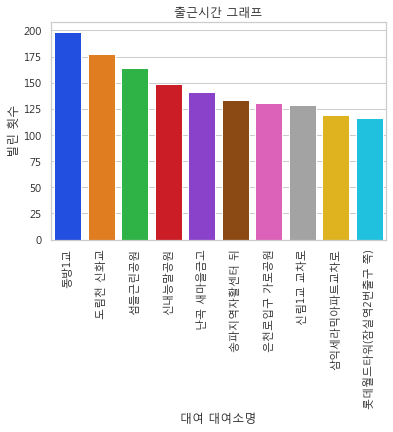

In [38]:
# 출근시간 그래프 만들기
sns.set(style="whitegrid", font="Malgun Gothic", palette='bright')
ax = sns.barplot(x="대여 대여소명", y="빌린 횟수", data=data2)
plt.xticks(rotation=90)
plt.title("출근시간 그래프")

Text(0.5, 1.0, '퇴근시간 그래프')

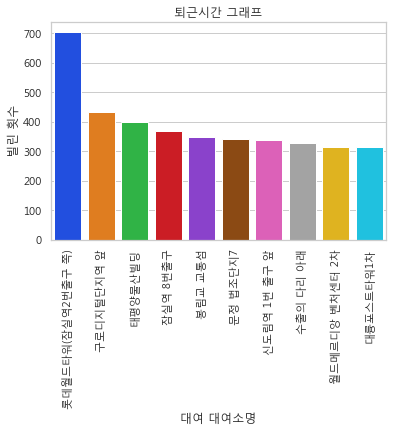

In [39]:
# 퇴근시간 그래프 만들기
sns.set(style="whitegrid", font="Malgun Gothic", palette='bright')
ax = sns.barplot(x="대여 대여소명", y="빌린 횟수", data=data3)
plt.xticks(rotation=90)
plt.title("퇴근시간 그래프")

Text(0.5, 1.0, '전체 그래프')

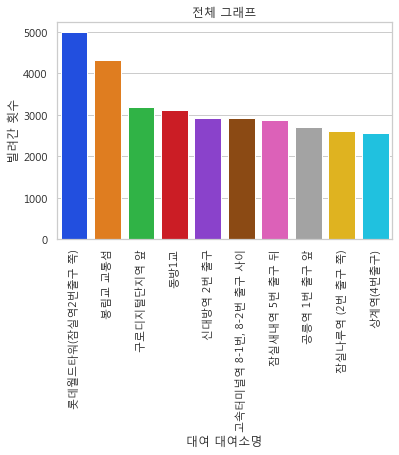

In [40]:
# 전체 그래프 만들기
sns.set(style="whitegrid", font="Malgun Gothic", palette='bright')
ax = sns.barplot(x="대여 대여소명", y="빌려간 횟수", data=data1)
plt.xticks(rotation=90)
plt.title("전체 그래프")

In [27]:
data1['위도'] = [37.512684, 37.486825, 37.484455, 37.470677, 37.486868, 
                     37.506015, 37.511954, 37.626481, 37.520691, 37.660025]
data1['경도'] = [127.102631, 126.928262, 126.901421, 126.939695, 126.912863,
                 127.003824, 127.084767, 127.072753, 127.103830, 127.072953]
data1

,대여소번호,빌려간 횟수,대여 대여소명,위도,경도
0,1210,4996,롯데월드타워(잠실역2번출구 쪽),37.512684,127.102631
4996,2102,4336,봉림교 교통섬,37.486825,126.928262
9332,1911,3190,구로디지털단지역 앞,37.484455,126.901421
12522,2183,3108,동방1교,37.470677,126.939695
15630,2177,2938,신대방역 2번 출구,37.486868,126.912863
18568,2219,2932,"고속터미널역 8-1번, 8-2번 출구 사이",37.506015,127.003824
21500,1222,2870,잠실새내역 5번 출구 뒤,37.511954,127.084767
24370,1608,2706,공릉역 1번 출구 앞,37.626481,127.072753
27076,1209,2621,잠실나루역 (2번 출구 쪽),37.520691,127.103830
29697,1625,2570,상계역(4번출구),37.660025,127.072953


In [28]:
data2['위도'] = [37.470677, 37.450424, 37.596393, 37.612921, 37.473658, 37.533164,
               37.542134, 37.478629, 37.657668, 37.512684]
data2['경도'] = [126.939695, 126.941118, 127.091309, 127.088697, 126.918476, 127.112142,
              126.844213, 126.931851, 127.014674, 127.102631]

In [36]:
data3['위도'] = [37.512684, 37.484455, 37.486427, 37.514853, 37.486825, 37.489263,
               37.509244, 37.476092, 37.538490, 37.483559]
data3['경도'] = [127.102631, 126.901421, 126.894585, 127.099223, 126.928262,
               127.130614, 126.890522, 126.881735, 126.870471, 126.895449]

In [1]:
pip install folium

  Using cached https://files.pythonhosted.org/packages/fd/a0/ccb3094026649cda4acd55bf2c3822bb8c277eb11446d13d384e5be35257/folium-0.10.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [30]:
import folium
map_osm = folium.Map(location=[37.517720, 127.050530], zoom_start=12)

In [31]:
map_osm1 = folium.Map(location=[37.517720, 127.050530], zoom_start=12)

In [32]:
map_osm2 = folium.Map(location=[37.517720, 127.050530], zoom_start=12)

In [33]:
# 함수 만들기
def location(data, maposm):
    for item in data.index:
        Latitude = data.loc[item]['위도']
        Longtitude = data.loc[item]['경도']
        folium.Marker([Latitude, Longtitude],
                      icon=folium.Icon(color='green', icon='star'),
                       popup=data.loc[item]['대여 대여소명']).add_to(maposm)
    return maposm

In [34]:
# 전체적으로 많이 사용된 위치
for item in data1.index:
    Latitude = data1.loc[item]['위도']
    Longtitude = data1.loc[item]['경도']
    folium.Marker([Latitude, Longtitude],
                      icon=folium.Icon(color='green', icon='star'),
                       popup=data1.loc[item]['대여 대여소명']).add_to(map_osm)
map_osm

In [35]:
#출근시간에 많이 사용된 위치
for item in data2.index:
    Latitude = data2.loc[item]['위도']
    Longtitude = data2.loc[item]['경도']
    folium.Marker([Latitude, Longtitude],
                      icon=folium.Icon(color='blue', icon='star'),
                       popup=data2.loc[item]['대여 대여소명']).add_to(map_osm1)
map_osm1

In [37]:
#퇴근시간에 많이 사용된 위치
for item in data3.index:
    Latitude = data3.loc[item]['위도']
    Longtitude = data3.loc[item]['경도']
    folium.Marker([Latitude, Longtitude],
                      icon=folium.Icon(color='red', icon='star'),
                       popup=data3.loc[item]['대여 대여소명']).add_to(map_osm2)
map_osm2

### 결론
- 출퇴근 시간에 가장 많이 따릉이를 대여한다
- 역 주변에서 가장 많이 대여되고, 반납되므로 해당 시간에 역 쪽에 따릉이릉 많이 배치한다.
- 특히, 출퇴근 시간 모두 가장 많은 대여가 일어나는 구로구와 잠실 쪽에 더 많이 따릉이를 배치하도록 한다.
     - 전체: 롯데월드타워(송파구), 봉림교 교통섬(관악구), 구로디지털단지역(구로구)
     - 출근시간: 동방 1교(관악구), 도림천 신화교(관악구), 섬들근린공원(중랑구)
     - 퇴근시간: 롯데월드타워(송파구), 구로디지털단지역(구로구), 태평양물산빌딩(구로구)
        